<p style="font-size: 100px;"><b>Gaussian Elimination</b></p>

<a name="1"></a>
## 1 - Introduction


<a name="1.1"></a>
### 1.1 How to complete this assignment

This assignment has $3$ graded functions. Each graded function will have some parts replaced as `None`. These parts you have to replace with the proper value. For instance, in the first graded function there is this line of code:

```Python
pivot_candidate = M[None, None]
```

This means that you must replace the correct values for the row (first None) and column (second None). Do not worry, the functions have comments on every line of code so you won't get lost!

After each graded function, there is a code to test your solution. It will test your function with some basic and quick tests to assure you are in the right path! **Note that these tests perform only basic tests, so you may pass in the unit tests but fail when submitting your code.** This is because when grading we perform more complex tests. However, in any case you will be provided with feedbacks so it will help you debugging your code.

<a name="1.2"></a>
### 1.2 Gaussian Elimination Algorithm

Gaussian elimination offers a systematic approach to solving systems of linear equations by transforming an augmented matrix into row-echelon form, thereby enabling the determination of variables. The algorithm comprises several essential steps:

**NOTE**:

- For simplicity, the algorithm you will develop here will only work on **non-singular** systems of equations, i.e., equations that have a unique solution.
- Remember you can check if a matrix is singular or not by computing its determinant.

### Step 1: Augmented Matrix

Consider a system of linear equations:

$$
\begin{align*}
2x_1 + 3x_2 + 5x_3&= 12 \\
-3x_1 - 2x_2 + 4x_3 &= -2 \\
x_1 + x_2 - 2x_3  &= 8 \\
\end{align*}
$$
Create the augmented matrix \([A | B]\), where \(A\) represents the coefficient matrix and \(B\) denotes the column vector of constants:

$$
A = \begin{bmatrix}
\phantom{-}2 & \phantom{-}3 & \phantom{-}5  \\
-3 & -2 & \phantom-4 \\
\phantom{-}1 & \phantom{-}1 & -2  \\
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
\phantom-12 \\ -2 \\ \phantom-8
\end{bmatrix}
$$

Thus, \([A | B]\) is represented as:

$$
\begin{bmatrix}
\phantom{-}2 & \phantom{-}3 & \phantom{-}5 & | & \phantom{-}12 \\
-3 & -2 & \phantom-4 & | & -2 \\
\phantom{-}1 & \phantom{-}1 & -2 & | & \phantom{-}8 \\
\end{bmatrix}
$$

Note: For this assignment, matrix \(A\) is **always square**, accommodating scenarios with \(n\) equations and \(n\) variables.

### Step 2: Transform Matrix into Row Echelon Form
Initiate row operations to convert the augmented matrix into row-echelon form. The objective is to introduce zeros below the leading diagonal.

- **Row Switching:** Rearrange rows to position the leftmost non-zero entry at the top.
- **Row Scaling:** Multiply a row by a non-zero scalar.
- **Row Replacement:** Substitute a row with the sum of itself and a multiple of another row.

### Step 3: Back Substitution

After attaining the row-echelon form, solve for variables starting from the last row and progressing upwards.

Remember, the aim is to simplify the system for easy determination of solutions!

### Step 4: Compile the Gaussian Elimination Algorithm

Combine each function related to the aforementioned steps into a single comprehensive function.

<a name="2"></a>
## 2 - Necessary imports

Next codeblock will import the necessary libraries to run this assignment. Please do not add nor remove any value there.

In [ ]:
import numpy as np

In [ ]:
import w2_unittest

<a name="3"></a>
## 3 - Auxiliary functions

This section introduces three auxiliary functions crucial for facilitating your assignment. These functions have already been coded, eliminating the need for your concern regarding their implementation. However, it's essential to examine them carefully to grasp their appropriate usage.


<a name="3.1"></a>
### 3.1 - Function swap rows

This function has as input a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and two indexes to swap the rows corresponding to those indexes. It **does not change the original matrix**, but returns a new one.

In [ ]:
def swap_rows(M, row_index_1, row_index_2):
    """
    Swap rows in the given matrix.

    Parameters:
    - matrix (numpy.array): The input matrix to perform row swaps on.
    - row_index_1 (int): Index of the first row to be swapped.
    - row_index_2 (int): Index of the second row to be swapped.
    """

    # Copy matrix M so the changes do not affect the original matrix.
    M = M.copy()
    # Swap indexes
    M[[row_index_1, row_index_2]] = M[[row_index_2, row_index_1]]
    return M

Let's practice with some examples. Consider the following matrix $M$.

In [ ]:
M = np.array([
[1, 3, 6],
[0, -5, 2],
[-4, 5, 8]
])
print(M)

[[ 1  3  6]
 [ 0 -5  2]
 [-4  5  8]]


Swapping row $0$ with row $2$:

In [ ]:
M_swapped = swap_rows(M, 0, 2)
print(M_swapped)

[[-4  5  8]
 [ 0 -5  2]
 [ 1  3  6]]


<a name="3.2"></a>
### 3.2 - Finding the first non-zero value in a column starting from a specific value

This function becomes essential when encountering a $0$ value during row operations. It determines whether a non-zero value exists below the encountered zero, allowing for potential row swaps. Consider the following scenario within a square matrix (non-augmented):

Let's say, during a specific step of the row-echelon form process, you've successfully reduced the first 2 rows, but you encounter a zero pivot (highlighted in red) in the third row. The task is to search, **solely in entries below the pivot**, for a potential row swap.

$$
\begin{bmatrix}
6 & 4 & 8 & 1 \\
0 & 8 & 6 & 4 \\
\color{darkred}0 & \color{darkred}0 & \color{red}0 & \color{darkred}3 \\
0 & 0 & 5 & 9
\end{bmatrix}
$$

Performing a row swap between indexes 2 and 3 (remember, indexing starts at 0!), the matrix transforms into:

$$
\begin{bmatrix}
6 & 4 & 8 & 1 \\
0 & 8 & 6 & 4 \\
0 & 0 & 5 & 9  \\
0 & 0 & 0 & 3
\end{bmatrix}
$$

Resulting in the matrix achieving the row-echelon form.

In [ ]:
def get_index_first_non_zero_value_from_column(M, column, starting_row):
    """
    Retrieve the index of the first non-zero value in a specified column of the given matrix.

    Parameters:
    - matrix (numpy.array): The input matrix to search for non-zero values.
    - column (int): The index of the column to search.
    - starting_row (int): The starting row index for the search.

    Returns:
    int or False: The index of the first non-zero value in the specified column, starting from the given row.
                Returns False if no non-zero value is found.
    """
    # Get the column array starting from the specified row
    column_array = M[starting_row:,column]
    for i, val in enumerate(column_array):
        # Iterate over every value in the column array.
        # To check for non-zero values, you must always use np.isclose instead of doing "val == 0".
        if not np.isclose(val, 0, atol = 1e-5):
            # If one non zero value is found, then adjust the index to match the correct index in the matrix and return it.
            index = i + starting_row
            return index
    # If no non-zero value is found below it, return None.
    return False

Let's practice with this function. Consider the following matrix.

In [ ]:
N = np.array([
[0, 5, -3 ,6 ,8],
[0, 6, 3, 8, 1],
[0, 0, 0, 0, 0],
[0, 0, 0 ,0 ,7],
[0, 2, 1, 0, 4]
]
)
print(N)

[[ 0  5 -3  6  8]
 [ 0  6  3  8  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  7]
 [ 0  2  1  0  4]]


If you search for a value below the first column starting at the first row, the function should return False:

In [ ]:
print(get_index_first_non_zero_value_from_column(N, column = 0, starting_row = 0))

False


Searching for the first non zero value in the last column starting from row with index 2, it should return 3 (index corresponding to the value 7).

In [ ]:
print(get_index_first_non_zero_value_from_column(N, column = -1, starting_row = 2))

3


<a name="3.3"></a>
### 3.3 - Find the first non zero element for any row

This function aids in locating the pivot within a designated row of a matrix. It identifies the index of the first non-zero element in the desired row. If no non-zero value is present, it returns None.

In [ ]:
def get_index_first_non_zero_value_from_row(M, row, augmented = False):
    """
    Find the index of the first non-zero value in the specified row of the given matrix.

    Parameters:
    - matrix (numpy.array): The input matrix to search for non-zero values.
    - row (int): The index of the row to search.
    - augmented (bool): Pass this True if you are dealing with an augmented matrix,
                        so it will ignore the constant values (the last column in the augmented matrix).

    Returns:
    int or False: The index of the first non-zero value in the specified row.
                Returns False if no non-zero value is found.
    """

    # Create a copy to avoid modifying the original matrix
    M = M.copy()


    # If it is an augmented matrix, then ignore the constant values
    if augmented == True:
        # Isolating the coefficient matrix (removing the constant terms)
        M = M[:,:-1]

    # Get the desired row
    row_array = M[row]
    for i, val in enumerate(row_array):
        # If finds a non zero value, returns the index. Otherwise returns None.
        if not np.isclose(val, 0, atol = 1e-5):
            return i
    return False

Let's practice with the same matrix as before:

In [ ]:
print(N)

[[ 0  5 -3  6  8]
 [ 0  6  3  8  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  7]
 [ 0  2  1  0  4]]


If not passing the argument `augmented`, then it is assumed the matrix is not augmented.

Looking for the first non-zero index in row $2$ must return False whereas in row $3$, the value returned must be $4$ (the index for the value $7$ in that row).

In [ ]:
print(f'Output for row 2: {get_index_first_non_zero_value_from_row(N, 2)}')
print(f'Output for row 3: {get_index_first_non_zero_value_from_row(N, 3)}')

Output for row 2: False
Output for row 3: 4


Now, let's pass the argument `augmented = True`. This will make the algorithm consider $N$ an augmented matrix, therefore the last column will be removed from consideration. Now, the output for row 3 (starting from 0) should be different, excluding the last column, the output should be `False` as well, since in the coefficient matrix (the matrix without the last column) there is no non-zero element:

In [ ]:
print(f'Output for row 3: {get_index_first_non_zero_value_from_row(N, 3, augmented = True)}')

Output for row 3: False


<a name="3.5"></a>
### 3.4 - Constructing the Augmented Matrix

This function constructs the augmented matrix by combining a square matrix of size $n \times n$, representing $n$ equations with $n$ variables each, with an $n \times 1$ matrix that denotes its constant values. The function concatenates both matrices to form the augmented matrix and returns the result.

In [ ]:
def augmented_matrix(A, B):
    """
    Create an augmented matrix by horizontally stacking two matrices A and B.

    Parameters:
    - A (numpy.array): First matrix.
    - B (numpy.array): Second matrix.

    Returns:
    - numpy.array: Augmented matrix obtained by horizontally stacking A and B.
    """
    augmented_M = np.hstack((A,B))
    return augmented_M

In [ ]:
A = np.array([[1,2,3], [3,4,5], [4,5,6]])
B = np.array([[1], [5], [7]])

print(augmented_matrix(A,B))

[[1 2 3 1]
 [3 4 5 5]
 [4 5 6 7]]


<a name="4"></a>
## 4 - Row echelon form

<a name="4.1"></a>

<a name="4.1"></a>
### 4.1 - Row Echelon Form

As discussed in the lectures, a matrix in row echelon form adheres to the following conditions:

- Rows consisting entirely of zeroes should be positioned at the bottom.
- Each non-zero row must have its left-most non-zero coefficient (termed as a **pivot**) located to the right of any row above it. Consequently, all elements below the pivot within the same column should be 0.


**NOTE:**

- The algorithm you will build will consider only non-singular system of equations, this implies that the coefficient matrix must have determinant different from $0$. Also, it implies one very important property: **the matrix's row echelon form will have all its pivots in the main diagonal**.This is an important property because it will simplify a lot the computation.

This form ensures a structured arrangement facilitating subsequent steps in the Gaussian elimination process.


Example of matrix **in row echelon form**

$$M =
\begin{bmatrix}
7 & 2 & 3 \\
0 & 9 & 4 \\
0 & 0 & 3 \\
\end{bmatrix}
$$

Examples of matrices that **are not in row echelon form**

$$
A = \begin{bmatrix}
1 & 2 & 2 \\
0 & 5 & 3 \\
1 & 0 & 8 \\
\end{bmatrix}
$$

$$B =
\begin{bmatrix}
1 & 2 & 3 \\
0 & 0 & 4 \\
0 & 0 & 7 \\
\end{bmatrix}
$$

Matrix $A$ fails to satisfy the criteria for row echelon form as there exists a non-zero element below the first pivot (located in row 0). Similarly, matrix $B$ does not meet the requirements as the second pivot (in row 1 with a value of 4) has a non-zero element below it.

<a name="4.2"></a>
### 4.2 - A worked example

In this section, you'll revisit an example from the lecture to facilitate the implementation of an algorithm. If you feel confident in proceeding with the algorithm, you may skip this section.

Consider matrix $M$ given by:

$$
M =
\begin{bmatrix}
* & * & * & \\
0 & \text{pivot} & * \\
0 & \text{value} & *
\end{bmatrix}
$$

Here, the asterisk (*) denotes any number. To nullify the last row (row $2$), two steps are required:

- Scale $R_1$ by the inverse of the pivot:

$$
\text{Row 1} \rightarrow \frac{1}{\text{pivot}} \cdot \text{Row }
$$

Resulting in the updated matrix with the pivot for row $1$ set to $1$:

$$
M =
\begin{bmatrix}
* & * & * & \\
0 & 1 & * \\
0 & \text{value} & *
\end{bmatrix}
$$

Next, to eliminate the value below the pivot in row $1$, apply the following formula:

$$
\text{Row 2} \rightarrow \text{Row 2} - \text{value}\cdot \text{Row 1}
$$

This transformation yields the modified matrix:

$$
M =
\begin{bmatrix}
* & * & * & \\
0 & 1 & * \\
0 & 0 & *
\end{bmatrix}
$$

**Note that the square matrix $A$ needs to be in row-echelon form. However, every row operation conducted must also affect the augmented (constant) part. This ensures that you are effectively preserving the solutions for the entire system!**

Let's review the example covered in the lecture.

$$
\begin{align*}
2x_2 + x_3 &= 3 \\
x_1 + x_2 +x_3 &= 6 \\
x_1 + 2x_2 + 1x_3 &= 12
\end{align*}
$$

Consequently, the square matrix $A$ is formulated as:

$$
A =
\begin{bmatrix}
0 & 2 & 1 & \\
1 & 1 & 1 & \\
1 & 2 & 1 &
\end{bmatrix}
$$

The column vector (a matrix of size $n \times 1$) is represented by:

$$
B =
\begin{bmatrix}
3\\
6\\
12
\end{bmatrix}
$$

Combining matrices $A$ and $B$ yields the augmented matrix $M$:

$$
M =
\begin{bmatrix}
0 & 2 & 1 & | & 3 \\
1 & 1 & 1 & | & 6 \\
1 & 2 & 1 & | & 12
\end{bmatrix}
$$

**Step 1:**

Commencing with row $0$: The initial candidate for the pivot is always the value in the main diagonal of the matrix. Denoting row $0$ as $R_0$:

$$R_0= \begin{bmatrix} 0 & 2 & 1 & | & 3 \end{bmatrix}$$

The value in the main diagonal is the element $M[0,0]$ (the first element of the first column). The first row can be accessed by performing $M[0]$, i.e., $M[0] = R_0$.

The first row operation involves **scaling by the pivot's inverse**. Since the value in the main diagonal is $0$, necessitating a non-zero value for scaling by its inverse, you must switch rows in this case. Note that $R_1$ has a value different from $0$ in the required index. Consequently, switching rows $0$ and $1$:

$$R_0 \rightarrow R_1$$
$$R_1 \rightarrow R_0$$

Resulting in the updated augmented matrix:

$$
M =
\begin{bmatrix}
1 & 1 & 1 & | & 6 \\
0 & 2 & 1 & | & 3 \\
1 & 2 & 1 & | & 12
\end{bmatrix}
$$

Now, the pivot is already $1$, eliminating the need for row scaling. Following the formula:

$$ R_1 \rightarrow  R_1 - 0 \cdot R_0 = R_1$$

Therefore, the second row remains unchanged. Moving to the third row ($R_2$), the value in the augmented matrix below the pivot from $R_0$ is $M[2,0]$, which is $1$.

$$R_2 = R_2 - 1 \cdot R_0 = \begin{bmatrix} 0 & 1 & 0 & | & 6  \end{bmatrix}$$

Resulting in the modified augmented matrix:

$$
M =
\begin{bmatrix}
1 & 1 & 1 & | & 6 \\
0 & 2 & 1 & | & 3 \\
0 & 1 & 0 & | & 6
\end{bmatrix}
$$

Progressing to the second row ($R_1$), the value in the main diagonal is $2$, different from zero. Scaling it by $\frac{1}{2}$:

$$R_1 = \frac{1}{2}R_1$$

Resulting in the augmented matrix:

$$
M =
\begin{bmatrix}
1 & 1 & 1 & | & 6 \\
0 & 1 & \frac{1}{2} & | & \frac{3}{2} \\
0 & 1 & 0 & | & 6
\end{bmatrix}
$$

Now, there's only one row below it for row replacement. The value just below the pivot is located at $M[2,1]$, which is $1$. Thus:

$$R_2 = R_2 - 1 \cdot R_1 = \begin{bmatrix} \phantom{-}0 & \phantom{-}0 & -\frac{1}{2} & | & \phantom{-}\frac{9}{2} \end{bmatrix} $$

Resulting in the augmented matrix:


$$
M =
\begin{bmatrix}
\phantom{-}1 & \phantom{-}1 & \phantom{-}1 & | & \phantom{-}6 \\
\phantom{-}0 & \phantom{-}1 & \phantom{-}\frac{1}{2} & | & \phantom{-}\frac{3}{2} \\
\phantom{-}0 & \phantom{-}0 & -\frac{1}{2} & | & \phantom{-}\frac{9}{2}
\end{bmatrix}
$$

Finally, normalizing the last row as

$$R_2 = -2 \cdot R_2$$

The resulting matrix is

$$
M =
\begin{bmatrix}
\phantom{-}1 & \phantom{-}1 & \phantom{-}1 & | & \phantom{-}6 \\
\phantom{-}0 & \phantom{-}1 & \phantom{-}\frac{1}{2} & | & \phantom{-}\frac{3}{2} \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & | & -9
\end{bmatrix}
$$

Thus, the matrix is now in row echelon form with unitary pivots.

Now you are ready to go! You will implement such algorithm in the following exercise.

<a name="ex01"></a>
### Exercise 1

This exercise involves implementing the elimination method to convert a matrix into row-echelon form. As discussed in lectures, the primary approach involves inspecting the values along the diagonal. If they equate to $0$, an attempt to swap rows should be made to obtain a non-zero value.


In [ ]:
# GRADED FUNCTION: row_echelon_form

def row_echelon_form(A, B):
    """
    Utilizes elementary row operations to transform a given set of matrices,
    which represent the coefficients and constant terms of a linear system, into row echelon form.

    Parameters:
    - A (numpy.array): The input square matrix of coefficients.
    - B (numpy.array): The input column matrix of constant terms

    Returns:
    numpy.array: A new augmented matrix in row echelon form with pivots as 1.
    """

    # Check if matrix A determinant is not zero
    det_A = np.linalg.det(A)

    # Returns "Singular system" if determinant is zero
    if np.isclose(det_A, 0) == True:
        return 'Singular system'

    # Make copies of the input matrices to avoid modifying the originals
    A = A.copy()
    B = B.copy()


    # Convert matrices to float to prevent integer division
    A = A.astype('float64')
    B = B.astype('float64')

    # Number of rows in the coefficient matrix
    num_rows = len(A)

    ### START CODE HERE ###

    # Transform matrices A and B into the augmented matrix M
    M = augmented_matrix(A,B)

    # Iterate over the rows.
    for row in range(num_rows):

        # Access the matrix value by typing M[row, column]. Remember that the pivot candidate is always in the main diagonal, which has the index for row and column
        pivot_candidate = M[row, row]

        # If pivot_candidate is zero, it cannot be a pivot for this row.
        # So check on the rows below pivot_candidate if there is a non-zero element in the same column

        if np.isclose(pivot_candidate, 0) == True:

            # Get the index of the first non-zero value below the pivot_candidate.
            first_non_zero_value_below_pivot_candidate = get_index_first_non_zero_value_from_column(M, row, row + 1)

            # Swap rows
            M = swap_rows(M, row, first_non_zero_value_below_pivot_candidate)

            # Get the pivot, which is in the main diagonal now
            pivot = M[row, row]

        # If pivot_candidate is already non-zero, then it is the pivot for this row
        else:
            pivot = pivot_candidate

        # Divide the current row by the pivot, so the new pivot will be 1. You may use the formula current_row -> 1/pivot * current_row
        M[row] = 1 / pivot * M[row]

        # Perform row reduction for rows below the current row
        for j in range(row + 1, num_rows):

            # Get the value in the row below the pivot value. Because of the pivot is in the main diagonal, the values in row j must have the same column index as the pivot.
            value_below_pivot = M[j, row]

            # Perform row reduction using the formula:
            # row_to_reduce -> row_to_reduce - value_below_pivot * pivot_row
            M[j] = M[j] - value_below_pivot * M[row]

    ### END CODE HERE ###

    return M


In [ ]:
A = np.array([[1,2,3],[0,1,0], [0,0,5]])
B = np.array([[1], [2], [4]])
row_echelon_form(A,B)

array([[1. , 2. , 3. , 1. ],
       [0. , 1. , 0. , 2. ],
       [0. , 0. , 1. , 0.8]])

In [ ]:
w2_unittest.test_row_echelon_form(row_echelon_form)

 All tests passed


<a name="5"></a>
## 5 - Back substitution

The final step of the algorithm involves back substitution, a crucial process in obtaining solutions for the linear system. As discussed in the lectures, this method initiates from the bottom and moves upwards. Utilizing elementary row operations, it aims to convert every element above the pivot into zeros, ending with a matrix in **reduced row echelon form**. The formula employed is:


$$\text{Row above} \rightarrow \text{Row above} - \text{value} \cdot \text{Row pivot}$$

In this equation, $\text{value}$ denotes the value above the pivot, which initially equals 1. To illustrate this process, let's consider the matrix discussed previously:

$$
M =
\begin{bmatrix}
\phantom{-}1 & -1 & \phantom{-}\frac{1}{2} & | & \phantom{-}\frac{1}{2} \\
\phantom{-}0 & \phantom{-}1 & \phantom{-}1 & | & -1 \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & | & -1
\end{bmatrix}
$$

Starting from bottom to top:

- $R_2$:

- -  $R_1 = R_1 - 1 \cdot R_2 = \begin{bmatrix} 0 & 1 & 0 & | & 0 \end{bmatrix}$
- - $R_0 = R_0 - \frac{1}{2} \cdot R_1 = \begin{bmatrix} 1 & -\frac{1}{2} & 0 & | & 1 \end{bmatrix}$

The resulting matrix is then

$$
M =
\begin{bmatrix}
\phantom{-}1 & -\frac{1}{2} & \phantom{-}0 & | & \phantom{-}1  \\
\phantom{-}0 & \phantom{-}1 & \phantom{-}0 & | & \phantom{-}0 \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & | & -1
\end{bmatrix}
$$

Moving to $R_1$:

- $R_1$:

- - $R_0 = R_0 - \left(-\frac{1}{2} R_1 \right) = \begin{bmatrix} 1 & 0 & 0 & | & 1 \end{bmatrix}$

And the final matrix is

$$
M =
\begin{bmatrix}
\phantom{-}1 & \phantom{-}0 & \phantom{-}0 & | & \phantom{-}1  \\
\phantom{-}0 & \phantom{-}1 & \phantom{-}0 & | & \phantom{-}0 \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & | & -1
\end{bmatrix}
$$

Note that after back substitution, the solution is just the values in the augmented column! In this case,

$$x_0 = 1 \\ x_1 =0\\ x_2 = -1

<a name="ex02"></a>
### Exercise 2

In this exercise you will implement a function to perform back substitution in an **augmented matrix with unique solution and in row echelon form with unitary pivots**

In [ ]:
# GRADED FUNCTION: back_substitution

def back_substitution(M):
    """
    Perform back substitution on an augmented matrix (with unique solution) in reduced row echelon form to find the solution to the linear system.

    Parameters:
    - M (numpy.array): The augmented matrix in row echelon form with unitary pivots (n x n+1).

    Returns:
    numpy.array: The solution vector of the linear system.
    """

    # Make a copy of the input matrix to avoid modifying the original
    M = M.copy()

    # Get the number of rows (and columns) in the matrix of coefficients
    num_rows = len(M)

    ### START CODE HERE ####

    # Iterate from bottom to top
    for row in range(num_rows):
        # Get the substitution row. Remember now you must proceed from bottom to top, so you must start at the last row in the matrix.
        # The last row in matrix is in the index num_rows - 1, then you need to subtract the current index.

        substitution_row = num_rows - 1 - row

        # Iterate over the rows above the substitution_row
        for j in range(row + 1, num_rows):

            # Get the row to be reduced. The indexing here is similar as above, with the row variable replaced by the j variable.
            row_to_reduce = M[num_rows - 1 - j]

            # Get the index of the first non-zero element in the substitution row. This values does not depend on j!
            index = get_index_first_non_zero_value_from_row(M, substitution_row)

            # Get the value of the element at the found index
            value = row_to_reduce[index]

            # Perform the back substitution step using the formula row_to_reduce = row_to_reduce - value * substitution row
            row_to_reduce = row_to_reduce - value * M[substitution_row]

            # Replace the updated row in the matrix, be careful with indexing!
            M[num_rows - 1 - j] = row_to_reduce

    ### END CODE HERE ####

     # Extract the solution from the last column
    solution = M[:,-1]

    return solution

In [ ]:
w2_unittest.test_back_substitution(back_substitution)

 All tests passed


<a name="6"></a>
## 6 - The Gaussian Elimination

<a name="6.1"></a>
### 6.1 - Bringing it all together

Your task now is to integrate all the steps achieved thus far. Start with a square matrix $A$ of size $ n \times n$ and a column matrix $B$ of size $n \times 1$ and transform the augmented matrix $[A | B]$ into reduced row echelon form. Subsequently, verify the existence of solutions. If solutions are present, proceed to perform back substitution to obtain the values. In scenarios where there are no solutions or an infinite number of solutions, handle and indicate these outcomes accordingly.

<a name="ex03"></a>
### Exercise 3

In this exercise you will combine every function you just wrote to finish the Gaussian Elimination algorithm.

In [ ]:
# GRADED FUNCTION: gaussian_elimination

def gaussian_elimination(A, B):
    """
    Solve a linear system represented by an augmented matrix using the Gaussian elimination method.

    Parameters:
    - A (numpy.array): Square matrix of size n x n representing the coefficients of the linear system
    - B (numpy.array): Column matrix of size 1 x n representing the constant terms.

    Returns:
    numpy.array or str: The solution vector if a unique solution exists, or a string indicating the type of solution.
    """

    ### START CODE HERE ###

    # Get the matrix in row echelon form
    row_echelon_M = row_echelon_form(A, B)

    # If the system is non-singular, then perform back substitution to get the result.
    # Since the function row_echelon_form returns a string if there is no solution, let's check for that.
    # The function isinstance checks if the first argument has the type as the second argument, returning True if it does and False otherwise.

    if not isinstance(row_echelon_M, str):
        solution = back_substitution(row_echelon_M)

    ### END SOLUTION HERE ###

    return solution


In [ ]:
w2_unittest.test_gaussian_elimination(gaussian_elimination)

 All tests passed


<a name="7"></a>
## 7 - Test with any system of equations!

The code below will allow you to write any equation in the format it is given below (any unknown lower case variables are accepted, in any order) and transform it in its respective augmented matrix so you can solve it using the functions you just wrote in this assignment!

You just need to change the equations variable, always keeping * to indicate product between unknowns and variables and one equation in each line!

In [ ]:
A = np.array([
            [3, 6, 6, 8],
            [5, 3, 6, 0],
            [0, 4,-5, 8],
            [0, 0, 4, 8]
            ])
B = np.array([
            [1],
            [-10],
            [8],
            [9]
            ])

variables = 'x y w z'
sols = gaussian_elimination(A, B)


if not isinstance(sols, str):
    for variable, solution in zip(variables.split(' '),sols):
        print(f"{variable} = {solution:.4f}")
else:
    print(sols)

IndexError: arrays used as indices must be of integer (or boolean) type

The value for each variables should be

x = -1.5414  
y = -0.5223  
w = -0.1210  
z = 1.1855  

If your output is looking like this, then you've made it! You finished the assignment to do Gaussian Elimination with python!

<p style="font-size: 100px;"><b>Joining and Visualizing Data<b></p>

# Import Libraries

In [ ]:
# Just run this cell, no need to edit

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter

# make sure we can see needed columns and rows
pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 500)

# Read Dataset

In [ ]:
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
product_details = pd.read_csv("olist_products_dataset.csv")
product_translate = pd.read_csv("product_category_name_translation.csv")

In [ ]:
# Just run this cell, no need to edit
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['month_name'] = orders['order_purchase_timestamp'].dt.strftime('%B')
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['day_name'] = orders['order_purchase_timestamp'].dt.strftime('%A')
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['timeday'] = pd.cut(orders['order_purchase_timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Dawn', 'Morning', 'Afternoon', 'Night'])

order_items['total_price'] = order_items['price'] + order_items['freight_value']

products = product_details.merge(product_translate, on='product_category_name', how='left')
products['product_category_name_english'] = np.where(products["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos','kitchen_portable_and_food_preparers', products['product_category_name_english'])
products['product_category_name_english'] = np.where(products["product_category_name"] == 'pc_gamer', 'pc_gaming', products['product_category_name_english'])
products['product_category_name'].fillna('not_defined_product', inplace= True)
products['product_category_name_english'].fillna('not_defined_product', inplace= True)
products.fillna(0, inplace=True)
products.rename(columns={'product_category_name_english': 'product_name'}, inplace=True)

## 1. How is the trend of number of orders based on the payment type?

In [ ]:
# Merge the 'orders' DataFrame with the 'payments' DataFrame on the 'order_id' column, include all records from 'orders' and matching records from 'payments'.
order_pay = orders.merge(payments, on='order_id', how='left')

# Filter the resulting DataFrame where 'order_status' is not 'canceled' and  the 'order_delivered_customer_date' is not null
order_pay = order_pay[(order_pay['order_status'] != 'canceled') & (order_pay['order_delivered_customer_date'].notnull())]
order_pay.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_name,day,day_of_week,day_name,hour,timeday,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,2.0,voucher,1.0,18.59


<div style="height: 300px; overflow-y: scroll;">
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }
    p {
      font-size: 20px;
    }
    .dataframe tbody tr th {
        vertical-align: top;
    }
    .dataframe thead th {
        text-align: right;
    }
</style>
<p><b>Expected Output:</b></p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>customer_id</th>
      <th>order_status</th>
      <th>order_purchase_timestamp</th>
      <th>order_approved_at</th>
      <th>order_delivered_carrier_date</th>
      <th>order_delivered_customer_date</th>
      <th>order_estimated_delivery_date</th>
      <th>year</th>
      <th>month</th>
      <th>month_name</th>
      <th>day</th>
      <th>day_of_week</th>
      <th>day_name</th>
      <th>hour</th>
      <th>timeday</th>
      <th>payment_sequential</th>
      <th>payment_type</th>
      <th>payment_installments</th>
      <th>payment_value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>1.0</td>
      <td>credit_card</td>
      <td>1.0</td>
      <td>18.12</td>
    </tr>
    <tr>
      <th>1</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>3.0</td>
      <td>voucher</td>
      <td>1.0</td>
      <td>2.00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>2.0</td>
      <td>voucher</td>
      <td>1.0</td>
      <td>18.59</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100749 entries, 0 to 103886
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100749 non-null  object        
 1   customer_id                    100749 non-null  object        
 2   order_status                   100749 non-null  object        
 3   order_purchase_timestamp       100749 non-null  datetime64[ns]
 4   order_approved_at              100735 non-null  object        
 5   order_delivered_carrier_date   100748 non-null  object        
 6   order_delivered_customer_date  100749 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100749 non-null  datetime64[ns]
 8   year                           100749 non-null  int64         
 9   month                          100749 non-null  int64         
 10  month_name                     100749 non-null  object        
 11  

In [ ]:
order_pay.year

0         2017
1         2017
2         2017
3         2018
4         2018
          ... 
103882    2017
103883    2018
103884    2017
103885    2018
103886    2018
Name: year, Length: 100749, dtype: int64

In [ ]:
# Group the 'order_pay' DataFrame by 'year', 'month', and 'payment_type', calculating the number of unique 'order_id's for each group, and then reset the index.
#groupred_payment = order_pay.groupby(['year', 'month', 'payment_type']).agg({'order_id':'nunique'}).reset_index()
grouped_payment = order_pay.groupby(['year', 'month', 'payment_type'])['order_id'].nunique().reset_index()

# Create a new column 'year_month' by concatenating 'year' and 'month' columns as strings.
grouped_payment['year_month'] = grouped_payment['year'].astype(str) + '-' + grouped_payment['month'].astype(str)

grouped_payment.head(3)

,year,month,payment_type,order_id,year_month
0,2016,10,boleto,51,2016-10
1,2016,10,credit_card,208,2016-10
2,2016,10,debit_card,2,2016-10


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }
    p {
      font-size: 20px;
    }
    .dataframe tbody tr th {
        vertical-align: top;
    }
    .dataframe thead th {
        text-align: right;
    }
</style>
<p><b>Expected output:</b></p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>year</th>
      <th>month</th>
      <th>payment_type</th>
      <th>order_id</th>
      <th>year_month</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2016</td>
      <td>10</td>
      <td>boleto</td>
      <td>51</td>
      <td>2016-10</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2016</td>
      <td>10</td>
      <td>credit_card</td>
      <td>208</td>
      <td>2016-10</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2016</td>
      <td>10</td>
      <td>debit_card</td>
      <td>2</td>
      <td>2016-10</td>
    </tr>
  </tbody>
</table>
</div>

Text(0.5, 1.0, 'Number of Orders by Payment Type Over Time')

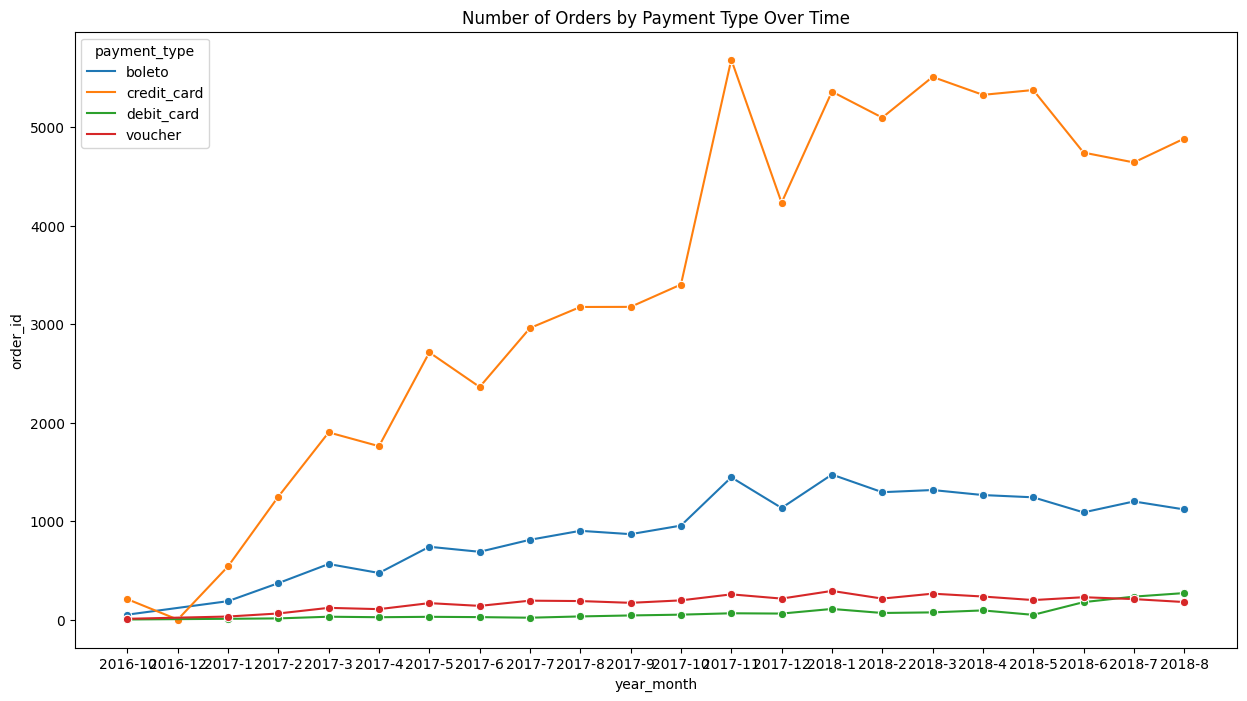

In [ ]:
# Plot the trend
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_payment, x='year_month', y='order_id', hue='payment_type', marker='o')
plt.title('Number of Orders by Payment Type Over Time')
# Hint: You can use the grouped data in previous cell. Number of orders could be obtained from order_id

Interpretation:  
Credit card adalah metode pembayaran yang memiliki trend paling stabil dan paling banyak digunakan oleh pelanggan. Sedangkan metode pembayaran lainnya memiliki trend yang fluktuatif.

## 2. What is the top 10 products with the highest revenue?

In [ ]:
# Just run this cell, no need to edit
ordered_products = order_items.merge(products, on='product_id', how='left')

In [ ]:
# Merge the 'order_pay' DataFrame with the 'ordered_products' DataFrame on the 'order_id' including all records from 'order_pay'.
order_df = order_pay.merge(ordered_products, on='order_id', how='left')
order_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_name,day,day_of_week,day_name,hour,timeday,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,1.0,credit_card,1.0,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,3.0,voucher,1.0,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,October,2,0,Monday,10,Morning,2.0,voucher,1.0,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


<div style="height: 300px; overflow-y: scroll;">
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }
    p {
      font-size: 20px;
    }
    .dataframe tbody tr th {
        vertical-align: top;
    }
    .dataframe thead th {
        text-align: right;
    }
</style>
<p><b>Expected Output:</b></p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>customer_id</th>
      <th>order_status</th>
      <th>order_purchase_timestamp</th>
      <th>order_approved_at</th>
      <th>order_delivered_carrier_date</th>
      <th>order_delivered_customer_date</th>
      <th>order_estimated_delivery_date</th>
      <th>year</th>
      <th>month</th>
      <th>month_name</th>
      <th>day</th>
      <th>day_of_week</th>
      <th>day_name</th>
      <th>hour</th>
      <th>timeday</th>
      <th>payment_sequential</th>
      <th>payment_type</th>
      <th>payment_installments</th>
      <th>payment_value</th>
      <th>order_item_id</th>
      <th>product_id</th>
      <th>seller_id</th>
      <th>shipping_limit_date</th>
      <th>price</th>
      <th>freight_value</th>
      <th>total_price</th>
      <th>product_category_name</th>
      <th>product_name_lenght</th>
      <th>product_description_lenght</th>
      <th>product_photos_qty</th>
      <th>product_weight_g</th>
      <th>product_length_cm</th>
      <th>product_height_cm</th>
      <th>product_width_cm</th>
      <th>product_name</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>1.0</td>
      <td>credit_card</td>
      <td>1.0</td>
      <td>18.12</td>
      <td>1</td>
      <td>87285b34884572647811a353c7ac498a</td>
      <td>3504c0cb71d7fa48d967e0e4c94d59d9</td>
      <td>2017-10-06 11:07:15</td>
      <td>29.99</td>
      <td>8.72</td>
      <td>38.71</td>
      <td>utilidades_domesticas</td>
      <td>40.0</td>
      <td>268.0</td>
      <td>4.0</td>
      <td>500.0</td>
      <td>19.0</td>
      <td>8.0</td>
      <td>13.0</td>
      <td>housewares</td>
    </tr>
    <tr>
      <th>1</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>3.0</td>
      <td>voucher</td>
      <td>1.0</td>
      <td>2.00</td>
      <td>1</td>
      <td>87285b34884572647811a353c7ac498a</td>
      <td>3504c0cb71d7fa48d967e0e4c94d59d9</td>
      <td>2017-10-06 11:07:15</td>
      <td>29.99</td>
      <td>8.72</td>
      <td>38.71</td>
      <td>utilidades_domesticas</td>
      <td>40.0</td>
      <td>268.0</td>
      <td>4.0</td>
      <td>500.0</td>
      <td>19.0</td>
      <td>8.0</td>
      <td>13.0</td>
      <td>housewares</td>
    </tr>
    <tr>
      <th>2</th>
      <td>e481f51cbdc54678b7cc49136f2d6af7</td>
      <td>9ef432eb6251297304e76186b10a928d</td>
      <td>delivered</td>
      <td>2017-10-02 10:56:33</td>
      <td>2017-10-02 11:07:15</td>
      <td>2017-10-04 19:55:00</td>
      <td>2017-10-10 21:25:13</td>
      <td>2017-10-18</td>
      <td>2017</td>
      <td>10</td>
      <td>October</td>
      <td>2</td>
      <td>0</td>
      <td>Monday</td>
      <td>10</td>
      <td>Morning</td>
      <td>2.0</td>
      <td>voucher</td>
      <td>1.0</td>
      <td>18.59</td>
      <td>1</td>
      <td>87285b34884572647811a353c7ac498a</td>
      <td>3504c0cb71d7fa48d967e0e4c94d59d9</td>
      <td>2017-10-06 11:07:15</td>
      <td>29.99</td>
      <td>8.72</td>
      <td>38.71</td>
      <td>utilidades_domesticas</td>
      <td>40.0</td>
      <td>268.0</td>
      <td>4.0</td>
      <td>500.0</td>
      <td>19.0</td>
      <td>8.0</td>
      <td>13.0</td>
      <td>housewares</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# Group the 'order_df' DataFrame by 'product_name' summing the 'payment_value' for each group. Then sort the result by 'revenue' in descending order.
best_selling_product = order_df.groupby(['product_name']).agg(revenue = ('payment_value', 'sum')).sort_values(by='revenue', ascending=False)

# Get the first 10 rows from the grouped data above.
top_10 = best_selling_product.head(10)
top_10

,revenue
product_name,
bed_bath_table,1692714.28
health_beauty,1620684.04
computers_accessories,1549252.47
furniture_decor,1394466.93
watches_gifts,1387046.31
sports_leisure,1349252.93
housewares,1069787.97
auto,833610.84
garden_tools,810614.93


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }
    p {
      font-size: 20px;
    }
    .dataframe tbody tr th {
        vertical-align: top;
    }
    .dataframe thead th {
        text-align: right;
    }
</style>
<p><b>Expected Output:</b></p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>revenue</th>
    </tr>
    <tr>
      <th>product_name</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>bed_bath_table</th>
      <td>1692714.28</td>
    </tr>
    <tr>
      <th>health_beauty</th>
      <td>1620684.04</td>
    </tr>
    <tr>
      <th>computers_accessories</th>
      <td>1549252.47</td>
    </tr>
    <tr>
      <th>furniture_decor</th>
      <td>1394466.93</td>
    </tr>
    <tr>
      <th>watches_gifts</th>
      <td>1387046.31</td>
    </tr>
    <tr>
      <th>sports_leisure</th>
      <td>1349252.93</td>
    </tr>
    <tr>
      <th>housewares</th>
      <td>1069787.97</td>
    </tr>
    <tr>
      <th>auto</th>
      <td>833610.84</td>
    </tr>
    <tr>
      <th>garden_tools</th>
      <td>810614.93</td>
    </tr>
    <tr>
      <th>cool_stuff</th>
      <td>744649.32</td>
    </tr>
  </tbody>
</table>
</div>

Text(0.5, 1.0, 'Top 10 Best Selling Products')

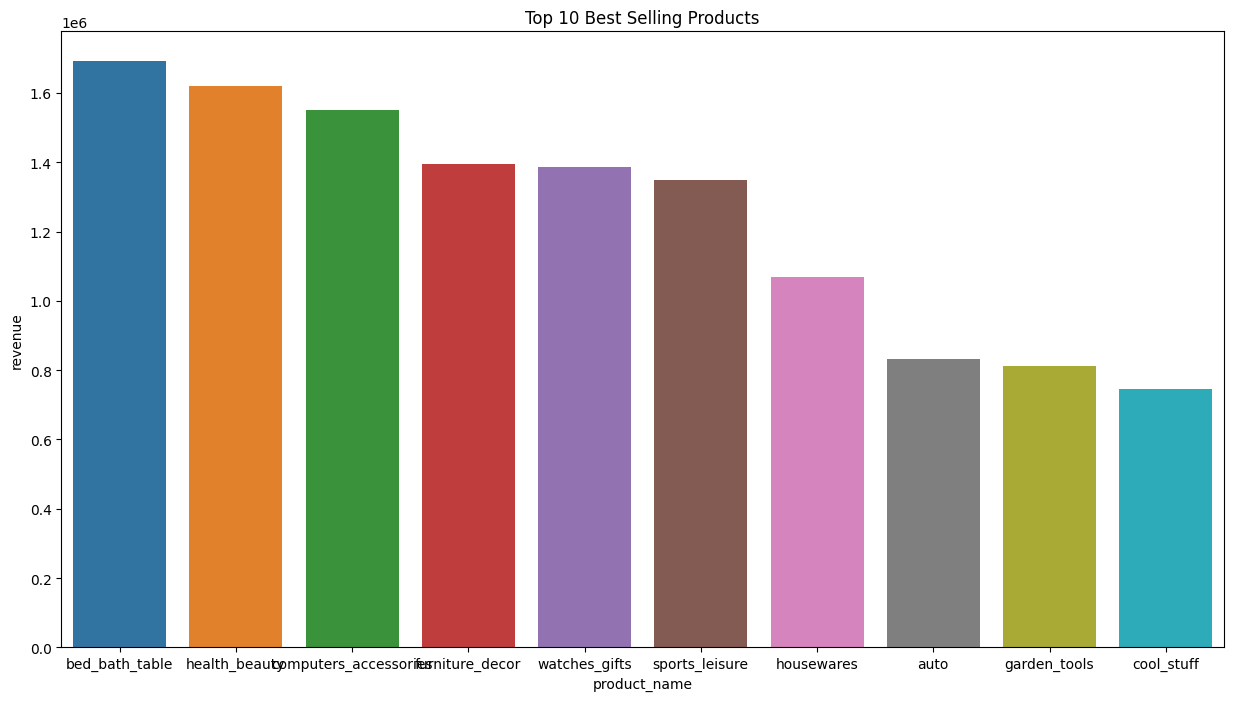

In [ ]:
# Visualize the top 10 products
plt.figure(figsize=(15, 8))
sns.barplot(data=top_10, x=top_10.index, y='revenue')
plt.title('Top 10 Best Selling Products')
# Hint: Use the the top 10 data you have defined berore. You can use the index for one of the axis.

Interpretation:  
Produk yang paling banyak terjual adalah bed_bath_table. Lalu diikuti oleh health_beauty dan sports_leisure.